In [4]:
pip install tensorflow



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [9]:
# Define paths
zip_path = r"C:\Users\Dell\Downloads\archive (4).zip"  # Adjust if necessary
extract_path = "/content/Bird Speciees Dataset"


Extracted files: ['Bird Speciees Dataset']
Dataset found at: /content/Bird Speciees Dataset\Bird Speciees Dataset
Image Counts Per Species: {'AMERICAN GOLDFINCH': 143, 'BARN OWL': 129, 'CARMINE BEE-EATER': 131, 'DOWNY WOODPECKER': 137, 'EMPEROR PENGUIN': 139, 'FLAMINGO': 132}


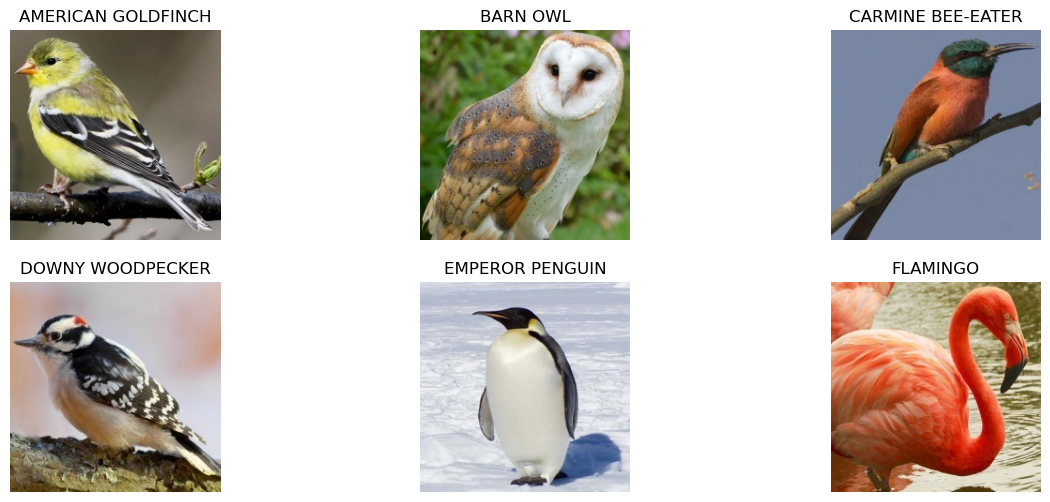

In [17]:

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)

dataset_path = None
for folder in extracted_files:
    potential_path = os.path.join(extract_path, folder)
    if os.path.isdir(potential_path):
        dataset_path = potential_path
        break

if dataset_path is None:
    raise FileNotFoundError("Dataset folder not found. Check extracted contents.")

print("Dataset found at:", dataset_path)

# Count images in each folder
species_list = os.listdir(dataset_path)
species_image_counts = {species: len(os.listdir(os.path.join(dataset_path, species))) for species in species_list if os.path.isdir(os.path.join(dataset_path, species))}
print("Image Counts Per Species:", species_image_counts)

# Visualize Sample Images
def show_sample_images():
    fig, axes = plt.subplots(2, 3, figsize=(15, 6))
    axes = axes.flatten()
    for i, species in enumerate(species_list[:10]):  # Show first 10 species
        species_path = os.path.join(dataset_path, species)
        if os.path.exists(species_path) and os.listdir(species_path):
            image_file = os.listdir(species_path)[0]  # Pick the first image
            img = Image.open(os.path.join(species_path, image_file))
            axes[i].imshow(img)
            axes[i].set_title(species)
            axes[i].axis("off")
    plt.show()

show_sample_images()

In [19]:
# Creating the Test and Train Directory

# Define the paths for train_dir and test_dir
train_dir = os.path.join(extract_path, 'train') # Assuming 'extract_path' is defined
test_dir = os.path.join(extract_path, 'test')  # Assuming 'extract_path' is defined


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir,exist_ok=True)

In [21]:
import os
import shutil
import random

# Assuming extract_path, train_dir, and test_dir are defined as in the previous code

# Get a list of bird species folders
species_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Iterate through each species folder
for bird_species in species_folders:
    species_folder = os.path.join(dataset_path, bird_species)

    # Get all image files in the species folder
    images = os.listdir(species_folder)

    # Shuffle images randomly to ensure train/test split variety
    random.shuffle(images)

    # Split images into training and testing sets (80% train, 20% test)
    split_index = int(0.8 * len(images))
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Create species folder in train and test directories
    train_species_folder = os.path.join(train_dir, bird_species)
    test_species_folder = os.path.join(test_dir, bird_species)

    os.makedirs(train_species_folder, exist_ok=True)
    os.makedirs(test_species_folder, exist_ok=True)

    # Copy images to the training set
    for image in train_images:
        src = os.path.join(species_folder, image)
        dst = os.path.join(train_species_folder, image)
        shutil.copyfile(src, dst)
    # Copy images to the testing set
    for image in test_images:
        src = os.path.join(species_folder, image)
        dst = os.path.join(test_species_folder, image)
        shutil.copyfile(src, dst)

# Confirmation message
print("Data has been split between test and train successfully")

Data has been split between test and train successfully


In [23]:
# Define the image shape
image_shape = (150, 150, 3)

image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # shift the pic width by max of 10%
                               height_shift_range=0.1, # shift the pic height by max of 10%
                               rescale=1/255, #Rescaling the image by normalizing it
                               shear_range=0.2, #Cutting away part of image (max 20%)
                               zoom_range=0.2, # Zoom in by max 20%
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                               )

In [25]:
# Initialize the Sequential model
# Import necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout  # Import Input from layers

# ... (rest of your code remains the same)

model = Sequential()

# First layer: Input layer
model.add(Input(shape=image_shape))
# First convolutional layer: extracts features from the input images
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# First max pooling layer: reduces spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer: captures more complex features
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Second max pooling layer: further reduces spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))
# Third convolutional layer: continues feature extraction
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Third max pooling layer: reduces spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output: converts 2D feature maps into a 1D vector
model.add(Flatten())

# Fully connected layer: learning complex representations
model.add(Dense(128))
# Activation function: introduces non-linearity
model.add(Activation('relu'))

# Dropout layer: helps prevent overfitting
model.add(Dropout(0.5))
# Output layer: 6 neurons for 6 bird species
model.add(Dense(6))
# Activation function: softmax for multi-class classification
model.add(Activation('softmax'))

# Compile the model: specifying loss function, optimizer, and metrics
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,367,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 6)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,424,710 (9.25 MB)

 Trainable params: 2,424,710 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
batch_size = 16

# Train Image Generator for multi-class classification
train_image_gen = image_gen.flow_from_directory(train_dir,
                                                target_size=image_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='categorical'  # For multi-class
                                                )

test_image_gen = image_gen.flow_from_directory(test_dir,
                                                target_size=image_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 646 images belonging to 6 classes.
Found 165 images belonging to 6 classes.


In [31]:
train_image_gen.class_indices

{'AMERICAN GOLDFINCH': 0,
 'BARN OWL': 1,
 'CARMINE BEE-EATER': 2,
 'DOWNY WOODPECKER': 3,
 'EMPEROR PENGUIN': 4,
 'FLAMINGO': 5}

In [33]:
# Checking for GPU
import tensorflow as tf
tf.test.gpu_device_name()

''

In [49]:
result = model.fit(train_image_gen,
                              epochs=100,
                              steps_per_epoch=49, #steps_per_epoch = Total_Images// BatchSize
                              validation_data=test_image_gen,
                              validation_steps=18) # Val Steps = Total_Images // Batchsize

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - accuracy: 0.9597 - loss: 0.1239 - val_accuracy: 0.9455 - val_loss: 0.3670
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 325ms/step - accuracy: 0.9802 - loss: 0.0850 - val_accuracy: 0.9515 - val_loss: 0.2860
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 324ms/step - accuracy: 0.9979 - loss: 0.0149 - val_accuracy: 0.9455 - val_loss: 0.3243
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 321ms/step - accuracy: 0.9753 - loss: 0.0717 - val_accuracy: 0.8970 - val_loss: 0.4617
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 324ms/step - accuracy: 0.9468 - loss: 0.1752 - val_accuracy: 0.9333 - val_loss: 0.3632
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 324ms/step - accuracy: 0.9789 - loss: 0.0626 - val_accuracy: 0.9333 - val_loss: 0.2524
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 321ms/step - accuracy: 0.9861 - loss: 0.0396 - val_accuracy: 0.9455 - val_loss: 0.2703
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 320ms/step - accuracy: 0.9845 - loss: 0.0369 - 

In [51]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_image_gen, steps=16)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9425 - loss: 0.1895 
Test Loss: 0.2400
Test Accuracy: 0.9333


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


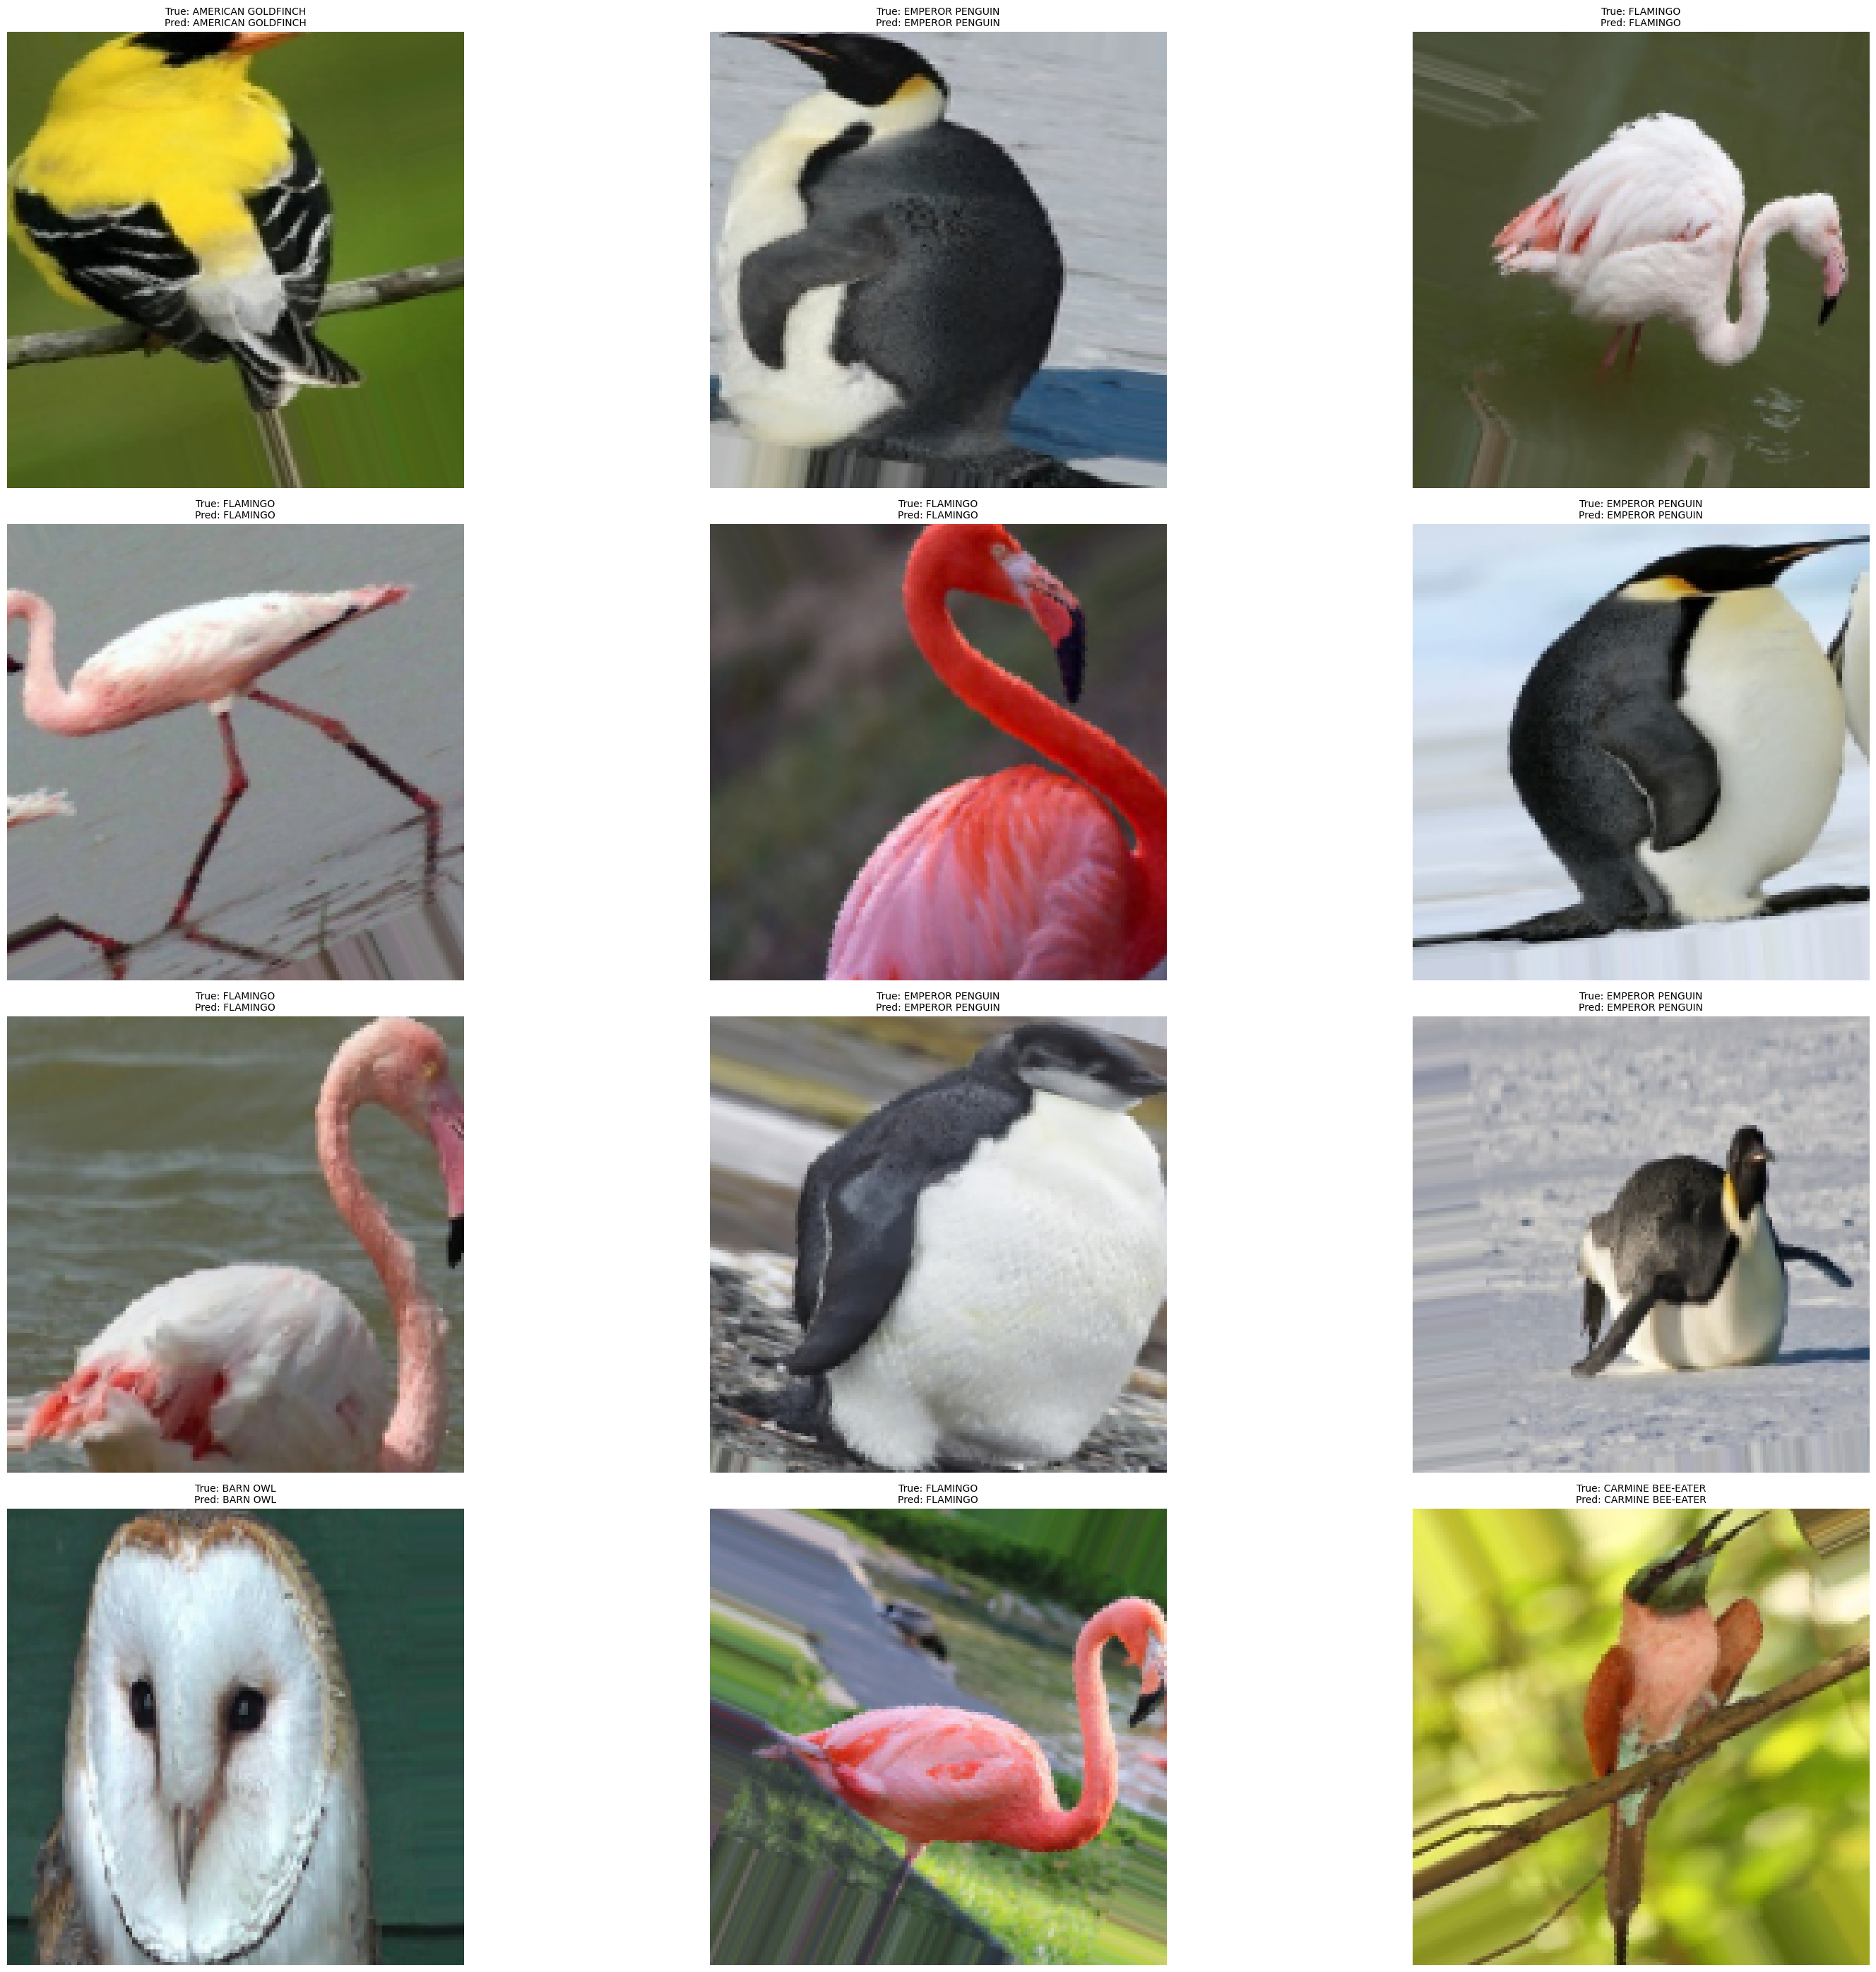

In [75]:
# Get a batch of test images and their true labels
X_test_batch, y_test_batch = next(test_image_gen)

# Make predictions for the batch
predictions = model.predict(X_test_batch)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get class labels
class_labels = list(test_image_gen.class_indices.keys())
# Display the first image in the batch along with true and predicted labels
plt.figure(figsize=(30, 35))
for i in range(12):  # Display 5 images
    plt.subplot(5, 3, i + 1)
    plt.imshow(X_test_batch[i])
    plt.axis('off')  # Hide the axis
    true_label = class_labels[y_test_batch[i].argmax()]
    predicted_label = class_labels[predicted_classes[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)

plt.tight_layout()
plt.show()